In [1]:
### Libs
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tqdm.notebook import tqdm
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

In [126]:
### Plot images
def plot_images(image_paths, caps, fig_size=(25, 12)):

    total_images = len(image_paths)
    fig, axes = plt.subplots(total_images, 2, figsize=fig_size, gridspec_kw={'width_ratios': [3, 1]})
    
    if total_images == 1:
        axes = [axes]
        
    for i, (image_path, (img_ax, text_ax)) in enumerate(zip(image_paths, axes)):
        # Display the image on the left
        if os.path.exists(image_path):
            img = mpimg.imread(image_path)
            img_ax.imshow(img)
            img_ax.axis('off') 
        else:
            img_ax.text(0.5, 0.5, "File not found", ha='center', va='center', fontsize=12)
            img_ax.axis('off')

        # Display the caption text on the right
        text_ax.text(-0.8, 0.5, caps[i][0] + "\n" + caps[i][1], ha='left', va='center', fontsize=24, wrap=True)
        text_ax.axis('off')  # Hide axis lines and ticks

    plt.subplots_adjust(wspace=0.05)
    plt.tight_layout()
    plt.show()



In [6]:
### Get paths
fmri_stim = np.load("./files/fmri_train_stim.npy", allow_pickle=True)
main_path_stim = "/projects/crunchie/boyanova/EEG_Things/data_set/Images"

imagePaths = []
for im in tqdm(fmri_stim):
    im_cat = im.split(".")[0][0:-4]
    imagePaths.append(os.path.join(main_path_stim, im_cat, im))


  0%|          | 0/8640 [00:00<?, ?it/s]

In [23]:
### Load model 
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

a photography of a dog laying on a towel on the floor
there is a black dog laying on a blue towel on the floor


In [62]:
### Get Captions
simulated_captions = []
for path in tqdm(imagePaths):
    raw_image = Image.open(path).convert('RGB')
    
    # conditional image captioning
    category = path.split("/")[-2]
    if "_" in category:
        category = category.replace("_", "")  
    text = "a picture of {}".format(category)
    inputs = processor(raw_image, text, return_tensors="pt")
    out1 = model.generate(**inputs)


    # unconditional image captioning
    inputs = processor(raw_image, return_tensors="pt")
    out2 = model.generate(**inputs)
    simulated_captions.append([processor.decode(out1[0], skip_special_tokens=True), 
                               processor.decode(out2[0], skip_special_tokens=True)])

np.save("fmri_train_sim_caps.npy", np.array(simulated_captions))

  0%|          | 0/8640 [00:00<?, ?it/s]

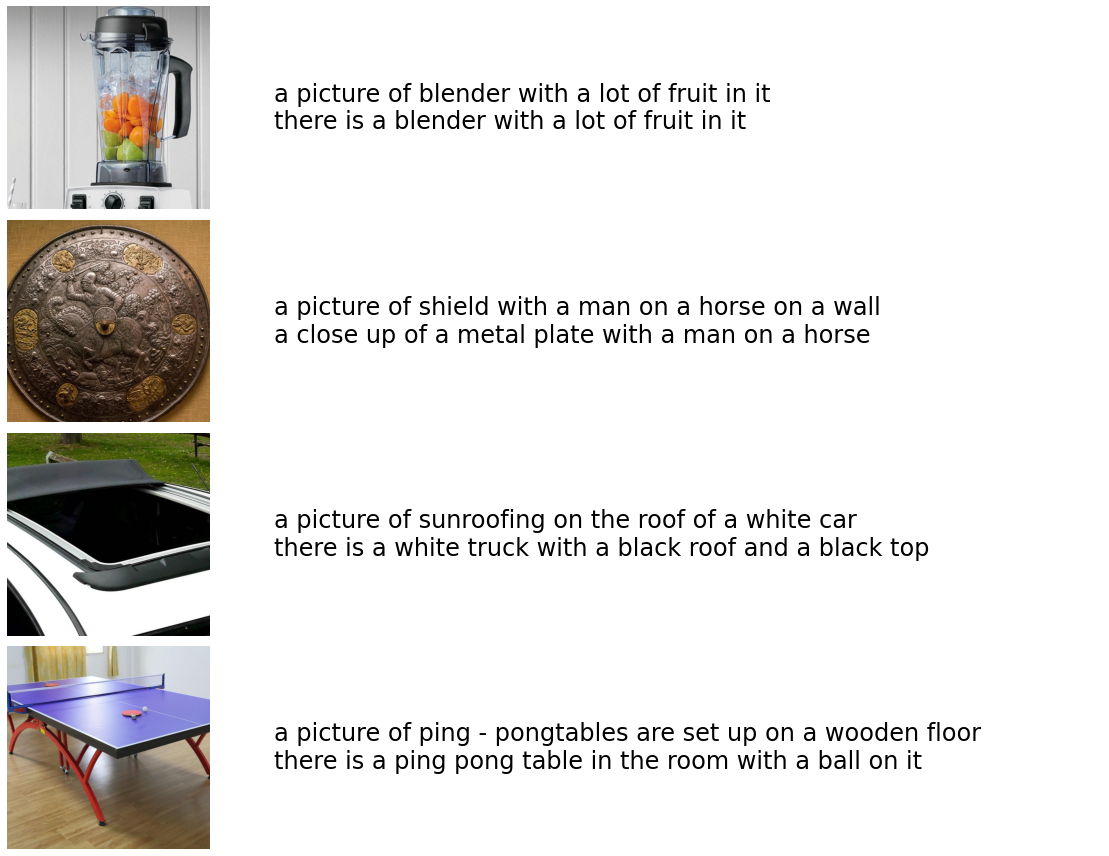

In [131]:
### Plot random
plot_images(imagePaths[46:50], simulated_captions[46:50])